### Bogdan Bintu
### Copyright Presidents and Fellows of Harvard College, 2018.

## MaxViewer demonstration
This notebook is intenede to demonstrated the basic capabilities of the MaxViewer.

MaxViewer is a matplotlib figure consisting of two max-projection subplots in xy and xz for the current image in a list of 3d images provided.

### Navigation and contras

Zooming/panning crops the max-projection region.

Pressing 'a', 'd' changes the images.

Pressing 'x' adjusts contrast to min-max in zoomed image.

### Fitting

Press 't' to automatically get the seed points. 

This effectively searches for local maximums (3-pix cubes) and compares them with the local minimums (3-pix cubes) and selects the points for which the difference is above a brightness threshold (default=150). If the maxviewer object is mv, then change the threshold by setting: mv_.th_seed=150

Right click to manually add other seed points. Shift+Right click to delete the nearest point.

Press 'y' to automatically fit the  the seed points. 

In [2]:
import MaxViewer as mv
import glob,os
import IOTools as io
import numpy as np

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


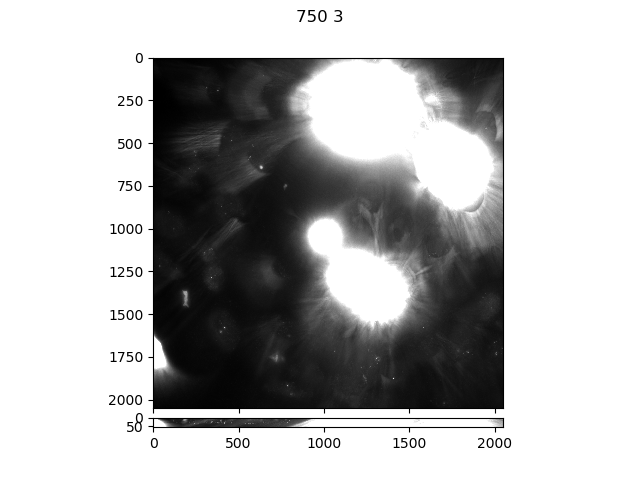

In [4]:
import glob,os
daxs = glob.glob(r'T:\20190227_g4\FISH\images\renamed_images\FISH_*_1.dax')
ims,lbl = [],[]
for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[112:168],im[168:]]
    lbl_ = ['650 '+str(id_+1),'750 '+str(id_+1)]
    lbl+=lbl_
mv_ = mv.imshow_mark_3d(ims,image_names=lbl)

<IPython.core.display.Javascript object>


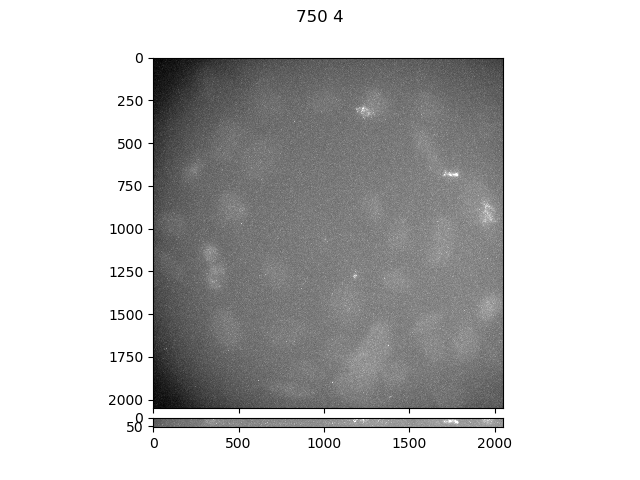

In [6]:
import glob,os
daxs = glob.glob(r'T:\20190227_g4\FISH\images\FISH_zz_02_*.dax')
ims,lbl = [],[]
for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[112:168],im[168:]]
    lbl_ = ['650 '+str(id_+1),'750 '+str(id_+1)]
    lbl+=lbl_
mv_ = mv.imshow_mark_3d(ims,image_names=lbl)

<IPython.core.display.Javascript object>


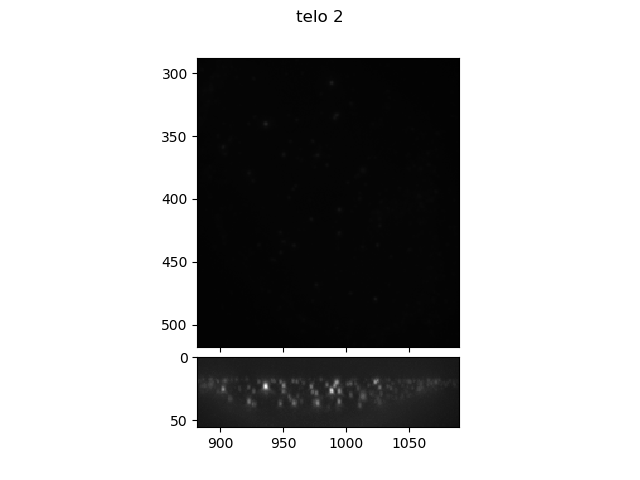

In [5]:
import glob,os
daxs = glob.glob(r'T:\20190227_g4\FISH\images\renamed_images\FISH_20_*.dax')
ims,lbl = [],[]
for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[:56]]
    lbl_ = ['telo ' +str(id_+1)]
    lbl+=lbl_
mv_ = mv.imshow_mark_3d(ims,image_names=lbl)

<IPython.core.display.Javascript object>


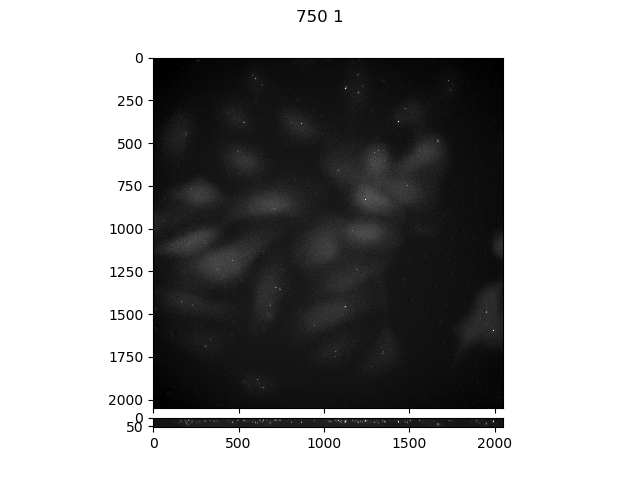

In [16]:
import glob,os
daxs = glob.glob(r'T:\20190312_post_fix_test\15_min_EGS\post-fix*.dax')
ims,lbl = [],[]
for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[0:56],im[112:168],im[168:224],im[224:280]]
    lbl_ = ['DAPI '+str(id_+1),'561 '+str(id_+1),'gH2AX '+str(id_+1),'750 '+str(id_+1)]
    lbl+=lbl_
mv_ = mv.imshow_mark_3d(ims,image_names=lbl)

In [6]:
daxs = glob.glob(r'T:\20190305_post_fix_test\EGS-5_mM\*.dax')
ims,lbl = [],[]
import numpy as np

for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[41:82]]

from scipy.ndimage.filters import maximum_filter,minimum_filter,median_filter,gaussian_filter
from scipy.spatial.distance import cdist,pdist,squareform
"""
filt_size = 3
gfilt_size_max = 3
gfilt_size_min = 1
im_plt=np.array(ims[0],dtype=np.float32)
#if gfilt_size>0:
#    im_plt = gaussian_filter(im,gfilt_size)
max_filt = maximum_filter(im_plt,filt_size)
min_filt = minimum_filter(im_plt,filt_size)
g_filt = gaussian_filter(im_plt,gfilt_size_max)
g_filt_sm = gaussian_filter(im_plt,gfilt_size_min)
im_plt2 = (max_filt==im_plt)&(min_filt!=im_plt)
z,x,y = np.where(im_plt2)
h = g_filt_sm[z,x,y]-g_filt[z,x,y]
"""

'\nfilt_size = 3\ngfilt_size_max = 3\ngfilt_size_min = 1\nim_plt=np.array(ims[0],dtype=np.float32)\n#if gfilt_size>0:\n#    im_plt = gaussian_filter(im,gfilt_size)\nmax_filt = maximum_filter(im_plt,filt_size)\nmin_filt = minimum_filter(im_plt,filt_size)\ng_filt = gaussian_filter(im_plt,gfilt_size_max)\ng_filt_sm = gaussian_filter(im_plt,gfilt_size_min)\nim_plt2 = (max_filt==im_plt)&(min_filt!=im_plt)\nz,x,y = np.where(im_plt2)\nh = g_filt_sm[z,x,y]-g_filt[z,x,y]\n'

In [7]:
filt_size = 3
gfilt_size_max = 5
gfilt_size_maximo = 8
gfilt_size_min = 3
im_plt=np.array(ims[0],dtype=np.float32)
#if gfilt_size>0:
#    im_plt = gaussian_filter(im,gfilt_size)
#max_filt = maximum_filter(im_plt,filt_size)
#min_filt = minimum_filter(im_plt,filt_size)
g_filt = gaussian_filter(im_plt,gfilt_size_max)
g_filt_sm = gaussian_filter(im_plt,gfilt_size_min)
g_filt_bg = gaussian_filter(im_plt,gfilt_size_maximo)
#im_plt2 = (max_filt==im_plt)&(min_filt!=im_plt)
#z,x,y = np.where(im_plt2)
h = g_filt_sm-g_filt
h2 = g_filt-g_filt_bg
h3 = g_filt_sm-g_filt_bg

In [13]:
min1 = minimum_filter(im_plt,2)
min2 = minimum_filter(im_plt,5)

In [ ]:
import FittingTools as ft
zxyh = ft.return_candidate_centers(ims[0],dist_th=20,ex=20,ey=20,ez=2,gmin=2,gmax=5,filtsz=5,th_seed=4,
                                   plt_val=False);

<IPython.core.display.Javascript object>


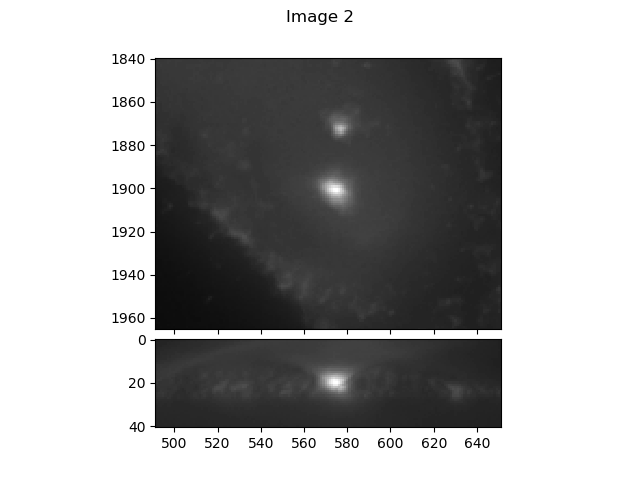

In [14]:
mv_ = mv.imshow_mark_3d([ims[0],min1,min2])

In [11]:
#generate two 3d images with artificial data

ims = mv.np.random.random([2,10,20,20])*100 # background base

real_pos=[] #record the few positions 
for i in range(5):
    pos = [2+mv.np.random.random()*6, 2+mv.np.random.random()*16, 2+mv.np.random.random()*16]
    real_pos.append(pos)
    ims[0] = mv.add_source(ims[0], pos=pos, h=300, sig=[1, 1, 1]) #add the random gaussian images with height 300

FittingTools.py:200: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  im[slices_im]+=im_ker[slices_ker]*h


<IPython.core.display.Javascript object>


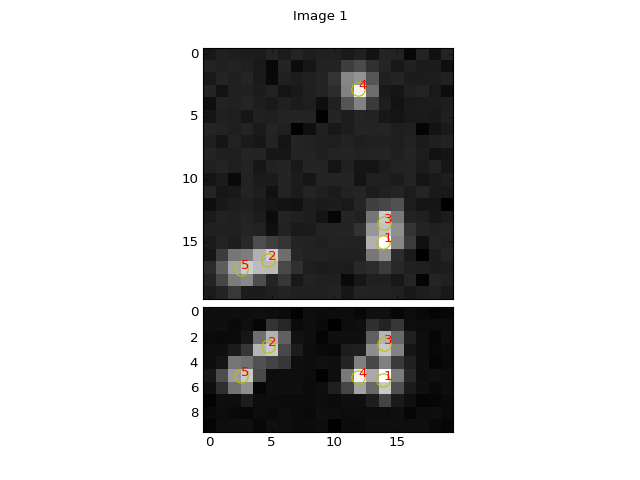

In [9]:
#get an instance of the MaxViewer and change the brightness threhold for the automatic seeding
mv_ = mv.imshow_mark_3d(ims)
mv_.th_seed=150

In [10]:
print 'true pos'
for pos in real_pos:
    print pos
    
print 'fitted pos'
for pos in mv_.pfits[:,1:4]:
    print pos

true pos
[5.089447975546375, 2.8417871729284006, 11.927688416545534]
[2.557184150455863, 13.399332444765164, 13.970631982214547]
[5.109621997056999, 17.12750995182538, 2.6428298236044174]
[2.6675298594193046, 16.52360386614317, 4.748530818585788]
[5.342850374679974, 14.978826983271597, 13.948823253778341]
fitted pos
[ 5.34199671 15.01428225 13.89799966]
[ 2.67448832 16.43857429  4.69029964]
[ 2.49507094 13.43155675 14.00551834]
[ 5.0913228   2.80624956 11.89995333]
[ 5.06864151 17.10787826  2.52860975]
